# Model Prediksi Harga Rumah (Jabodetabek)

Model ini dikembangkan untuk memprediksi kategori harga sebuah rumah dengan menganalisis berbagai atributnya, seperti jumlah kamar, luas tanah, dan luas bangunan.

## Library

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Cleaning

### Import Data

In [217]:
data_url = 'https://raw.githubusercontent.com/MuhGhifari/Prediksi-Harga-Rumah-Jabodetabek/refs/heads/main/jabodetabek_house_price.csv'
data = pd.read_csv(
  data_url,
  usecols=[
    'price_in_rp',
    'latitude',
    'longitude',
    'bedrooms',
    'bathrooms',
    'land_size_m2',
    'building_size_m2',
    'carports',
    'maid_bedrooms',
    'maid_bathrooms',
    'floors',
    'building_age',
    'year_built',
    'property_condition',
    'garages',
  ]
)

data.rename(
  columns={
    'price_in_rp': 'price',
    'land_size_m2': 'land_size',
    'building_size_m2': 'building_size'
  },
  inplace=True
)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               3553 non-null   float64
 1   latitude            3553 non-null   float64
 2   longitude           3553 non-null   float64
 3   bedrooms            3519 non-null   float64
 4   bathrooms           3524 non-null   float64
 5   land_size           3551 non-null   float64
 6   building_size       3551 non-null   float64
 7   carports            3553 non-null   float64
 8   maid_bedrooms       3553 non-null   float64
 9   maid_bathrooms      3553 non-null   float64
 10  floors              3547 non-null   float64
 11  building_age        2108 non-null   float64
 12  year_built          2108 non-null   float64
 13  property_condition  3307 non-null   object 
 14  garages             3553 non-null   float64
dtypes: float64(14), object(1)
memory usage: 416.5+ KB


### Clean Null Values

Lihat kolom-kolom yang mempunyai nilai NULL

In [218]:
nullColumns = data.columns[data.isnull().any()]
print(nullColumns)

rowsBeforeCleaning = len(data)

Index(['bedrooms', 'bathrooms', 'land_size', 'building_size', 'floors',
       'building_age', 'year_built', 'property_condition'],
      dtype='object')


#### Bedrooms
hapus semua data yang tidak mempunyai info 'bedrooms"

In [219]:
nullIndex = pd.isnull(data['bedrooms'])
print(f"effected rows : {len(data[nullIndex])}")
data = data.dropna(subset=['bedrooms'])

effected rows : 34


#### Bathrooms
hapus semua data yang tidak mempunyai info 'bathrooms'

In [220]:
nullIndex = pd.isnull(data['bathrooms'])
print(f"effected rows : {len(data[nullIndex])}")
data = data.dropna(subset=['bathrooms'])

effected rows : 5


#### Floors
hapus semua data yang tidak mempunyai info 'floors'

In [221]:
nullIndex = pd.isnull(data['floors'])
print(f"effected rows : {len(data[nullIndex])}")
data = data.dropna(subset=['floors'])

effected rows : 4


#### Building Age & Year Built
lihat semua data yang tidak mempunyai umur bangunan

In [222]:
nullIndex = pd.isnull(data['building_age'])
print(f"effected rows : {len(data[nullIndex])}")

effected rows : 1429


Lihat semua data umur bangunan dan tahun dibangunnya

In [223]:
print(data['building_age'].unique())

[  5.  nan   6.   9.   8.   7.   0.   2.   4.  11.   1.  12.  16.  22.
   3.  15.  13.  10.  18.  37.  14.  21.  17.  28.  19.  20.  27. 152.
  52.  36.  42.  26.  29.  32.  23.  34.  40.  24.  46.  45.  49. 121.
  30.]


In [224]:
print(data['year_built'].sort_values().unique())

[1870. 1901. 1970. 1973. 1976. 1977. 1980. 1982. 1985. 1986. 1988. 1990.
 1992. 1993. 1994. 1995. 1996. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021. 2022. 2023. 2024. 2052.   nan]


Lihat grafik umur dan tahun dibangun

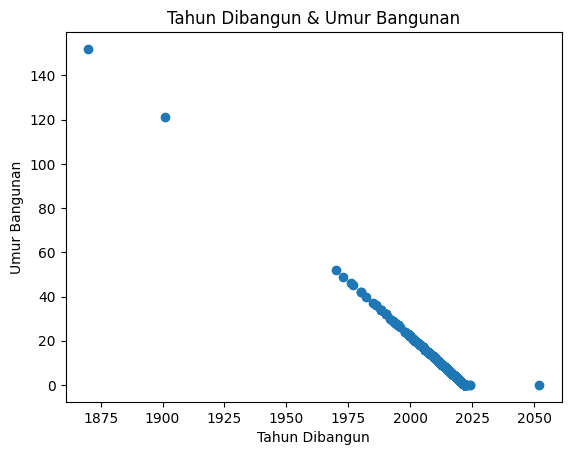

In [225]:
plt.scatter(data['year_built'], data['building_age'])
plt.xlabel('Tahun Dibangun')
plt.ylabel('Umur Bangunan')
plt.title('Tahun Dibangun & Umur Bangunan')
plt.show()

Dapat dilihat bahwa terdapat data yang tidak valid, yaitu bangunan yang tercatat dibangun setelah tahun **2022** (*tahun pengumpulan data*). Selain itu, seluruh bangunan yang dibangun pada tahun 2022 memiliki usia 0 tahun, sehingga dapat disimpulkan bahwa data ini memang dikumpulkan pada tahun 2022. Oleh karena itu, seluruh entri bangunan dengan tahun pembangunan lebih dari 2022 akan dihapus dari dataset.

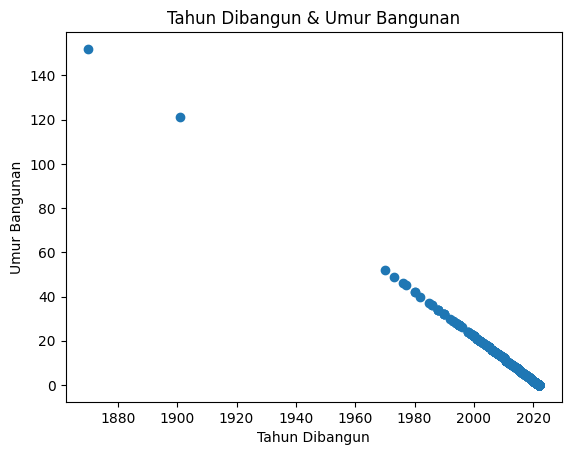

In [226]:
data = data.drop(data[data['year_built'] > 2022].index)
plt.scatter(data['year_built'], data['building_age'])
plt.xlabel('Tahun Dibangun')
plt.ylabel('Umur Bangunan')
plt.title('Tahun Dibangun & Umur Bangunan')
plt.show()

#### Property Condition
Hapus semua data yang tidak memiliki kondisi properti



In [227]:
nullIndex = pd.isnull(data['property_condition'])
print(f"effected rows : {len(data[nullIndex])}")
data = data.dropna(subset=['property_condition'])

effected rows : 237


#### Hasil Cleaning

Lihat kolom yang mempunyai null

In [229]:
nullColumns = data.columns[data.isnull().any()]
print(nullColumns)

Index(['building_age', 'year_built'], dtype='object')


Dapat dilihat bahwa masih ada beberapa data yang memiliki **NULL** values, namun data-data tersebut sangat banyak dan atribut selain `year_built` dan `building_age` masih dapat dipakai untuk keperluan lainnya, maka data-data tersebut masih disimpan.

Jumlah data yang dihapus

In [228]:
rowsAfterCleaning = len(data)
print(f"Jumlah data sebelum cleaning : {rowsBeforeCleaning}")
print(f"Jumlah data setelah cleaning : {rowsAfterCleaning}")
print(f"Jumlah data yang dihapus : {rowsBeforeCleaning - rowsAfterCleaning}")

Jumlah data sebelum cleaning : 3553
Jumlah data setelah cleaning : 3269
Jumlah data yang dihapus : 284
